In [1]:
from iFRAPpy import ExperimentGroup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
frap = ExperimentGroup('/Volumes/HELHEIM/analyzed_data/diffusivity/')

<Figure size 640x480 with 0 Axes>

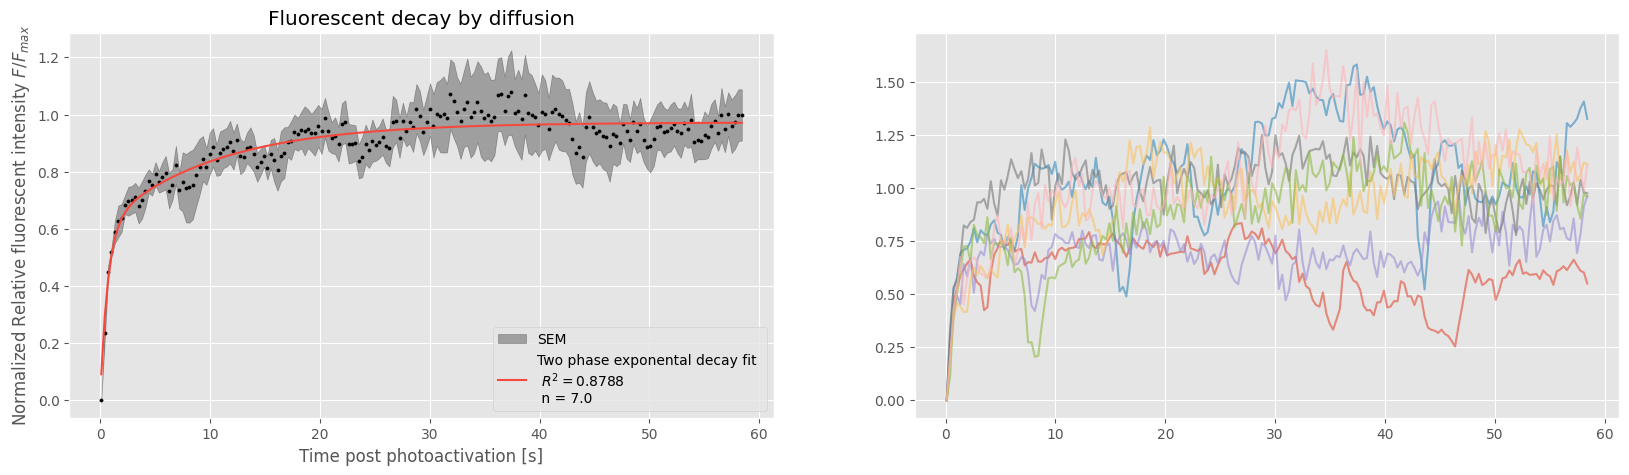

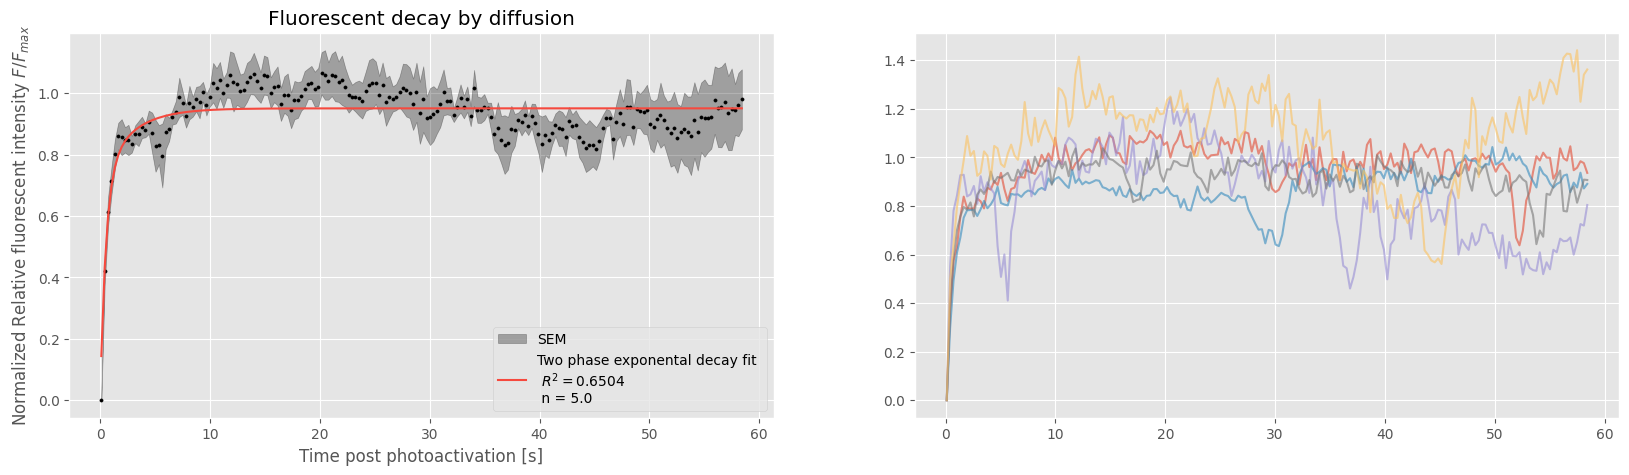

In [3]:
hyper10 = frap.add_experiment('Vasa(AA1-164)', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_hypergerm/10hpf', molecular_weight=44.25506 , disorder=1)
hyper24 = frap.add_experiment('Vasa(AA1-164)', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_hypergerm/24hpf', molecular_weight=44.25506 , disorder=1)

In [4]:
vasa10 = frap.add_experiment('Full length Vasa', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_full_vasa/10hpf', molecular_weight=104.06211, disorder=0.4056)
vasa24 = frap.add_experiment('Full length Vasa', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_full_vasa/24hpf', molecular_weight=104.06211, disorder=0.4056)

In [5]:
dnd10 = frap.add_experiment('Dead end', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_dnd/10hpf', molecular_weight=73.17418 , disorder=0.2871)
dnd24 = frap.add_experiment('Dead end', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_dnd/24hpf', molecular_weight=73.17418, disorder=0.2871)

In [6]:
dazl10 = frap.add_experiment('Dazl', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_dazl/10hpf', molecular_weight=52.93738 , disorder=0.4760)
dazl24 = frap.add_experiment('Dazl', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_dazl/24hpf', molecular_weight=52.93738, disorder=0.4760)

In [7]:
mdazl =frap.add_experiment('Dazl F91A', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_mutdazl/10hpf', molecular_weight=52.95139 , disorder=0.4760)

In [9]:
gra10 = frap.add_experiment('Granulito', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_gra/10hpf', molecular_weight=43.90804, disorder=0.2979)
gra24 = frap.add_experiment('Granulito', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_gra/24hpf', molecular_weight=43.90804, disorder=0.2979)

In [10]:
tdrd7 = frap.add_experiment('Tdrd7', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_tdrd7/10hpf', molecular_weight=148, disorder=0)

In [11]:
nos10 = frap.add_experiment('Nanos', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_nanos/10hpf', molecular_weight=44.98995, disorder=0)
nos24 = frap.add_experiment('Nanos', 24, '/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_nanos/24hpf', molecular_weight=44.98995, disorder=0)

In [142]:
graGl = frap.add_experiment('Granulito OEx', 10, '/Volumes/HELHEIM/raw_data/20230402_F040_oex/sorted_from_random/oex', molecular_weight=43.90804, disorder=0.2979)

In [144]:
frap.ten24bars()

AttributeError: 'ExperimentGroup' object has no attribute 'ten24bars'

***
Bar graph generation from here on

In [2]:
from plot_library import bar_graphs

In [12]:
bar_graphs(['Vasa(AA1-164) 10hpf', 'Vasa(AA1-164) 24hpf',
            'Full length Vasa 10hpf', 'Full length Vasa 24hpf',
            'Dead end 10hpf', 'Dead end 24hpf',
            'Granulito 10hpf', 'Granulito 24hpf',
            'Nanos 10hpf',# 'Nanos 24hpf',
            'Dazl 10hpf',#'Dazl 24hpf', 'Dazl F91A 10hpf'
            ], 'allmore1024')

KeyError: 'Vasa(AA1-164) 10hpf'

In [13]:
bar_graphs(['Granulito 10hpf', 'Granulito OEx 10hpf'], 'allmore1024')

KeyError: 'Granulito 10hpf'

In [3]:
def get_taus(list_of_files):
    lst_tau = []
    lst_th = []
    for file in list_of_files:
        fit_file = os.path.join(rt, file, 'xprt', 'csv', 'fit_parameters.csv')
        try:
            df_fit = pd.df_fit = pd.read_csv(fit_file, index_col=0)


            lst_tau.append(df_fit.loc['tau slow'].values[0])
            lst_th.append(df_fit.loc['t(1/2) slow'].values[0])
        except:
            pass
            # lst_tau.append(np.nan)
            # lst_th.append(np.nan)
    return lst_tau, lst_th

In [15]:
comp_tau = []
x_val = []
comp_th = []
for i, tp in enumerate([10, 24]):
    rt = f'/Volumes/HELHEIM/analyzed_data/diffusivity/FRAP_nanos/{str(tp)}hpf'
    lof = os.listdir(rt)
    t, th = get_taus(lof)
    comp_tau.append(t)
    comp_th.append(th)
    print(len(th), tp)
    x_val.append([i]*len(t))



8 10
3 24


In [16]:
comp_tau

[[73.43798064417305,
  31.992587837276943,
  40.92665059095465,
  0.9898069909423576,
  0.3628995829825183,
  7.442065214128861,
  1.3516861334993746,
  11.37373023522665],
 [0.0780356005108338, 1.7916176133233537, 5.508205550456999]]

<Figure size 640x480 with 0 Axes>

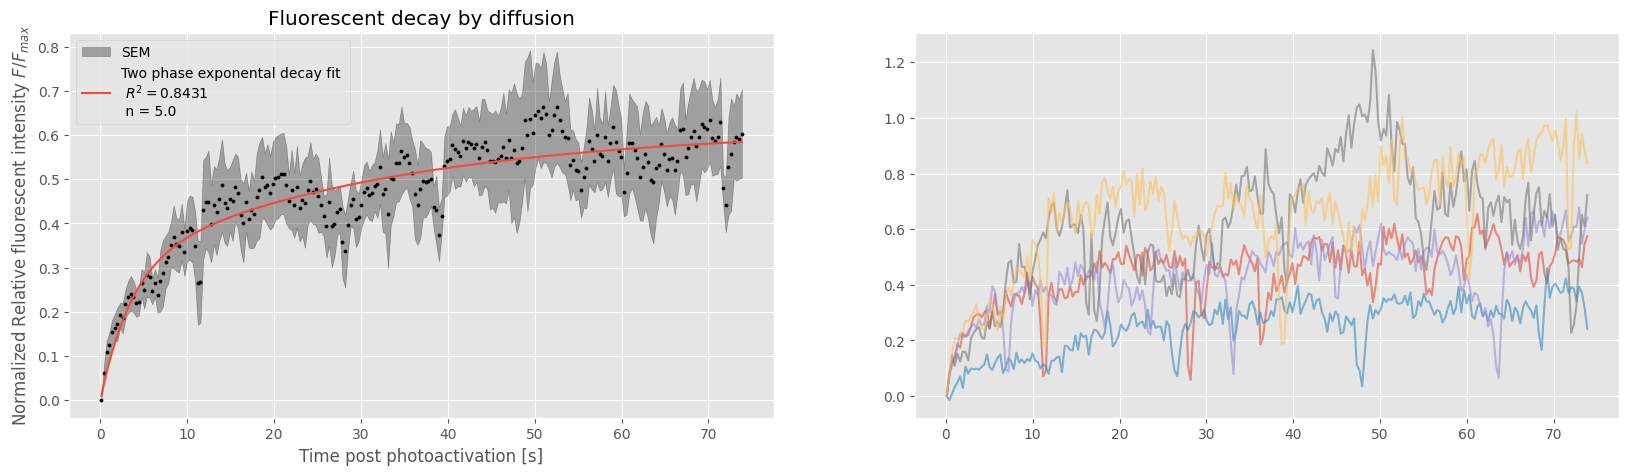

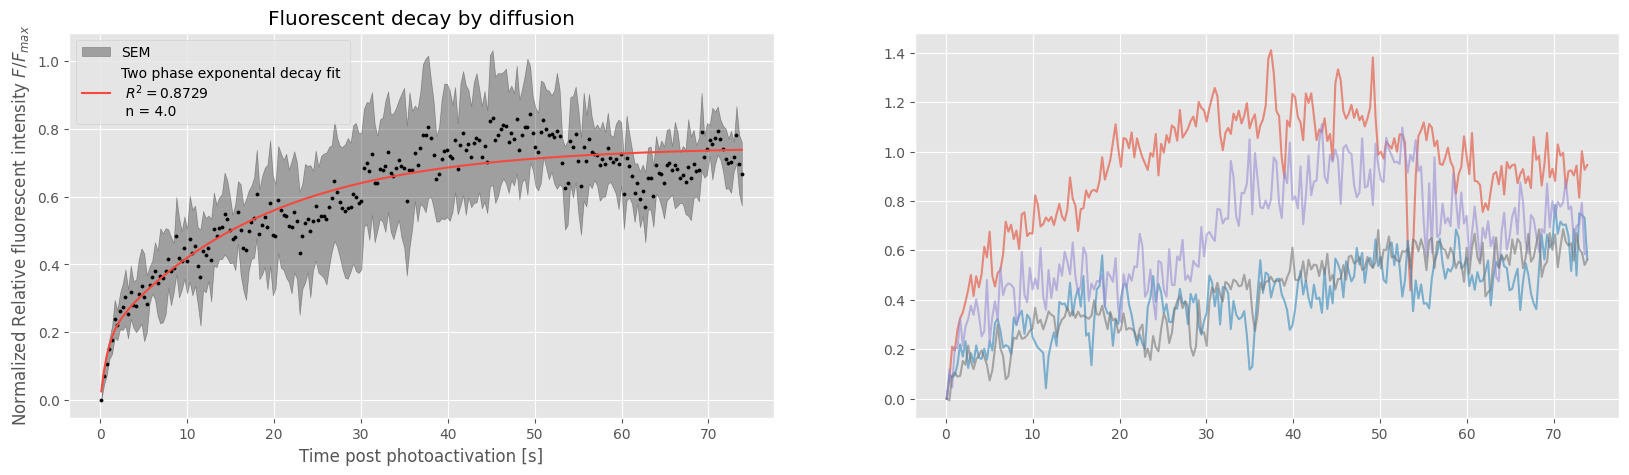

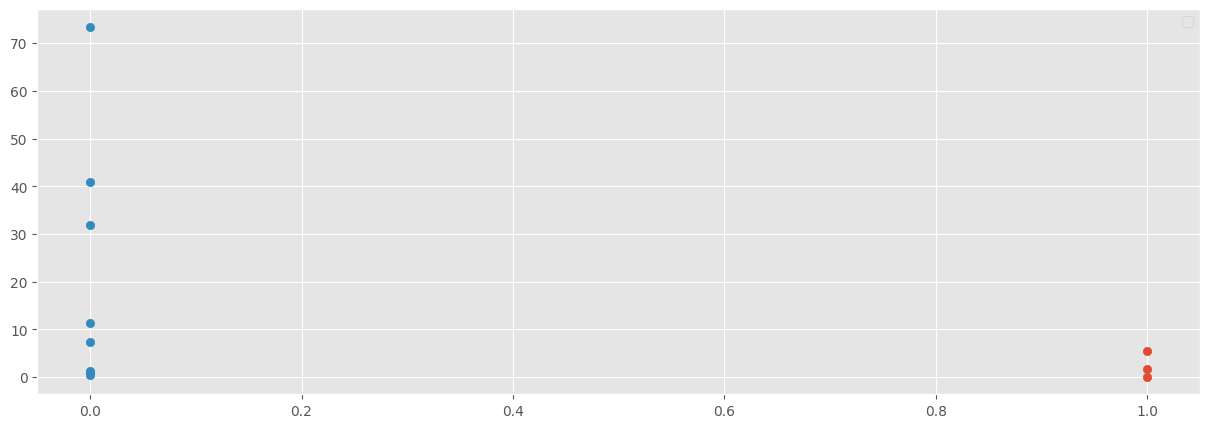

In [17]:
plt.scatter(x_val[1], comp_tau[1])
plt.scatter(x_val[0], comp_tau[0])
plt.show()

***
Glycogenase Overexpression and control

In [4]:
glycox = ExperimentGroup('/Volumes/HELHEIM/analyzed_data/diffusivity/glycogen_overexpression')

<Figure size 640x480 with 0 Axes>

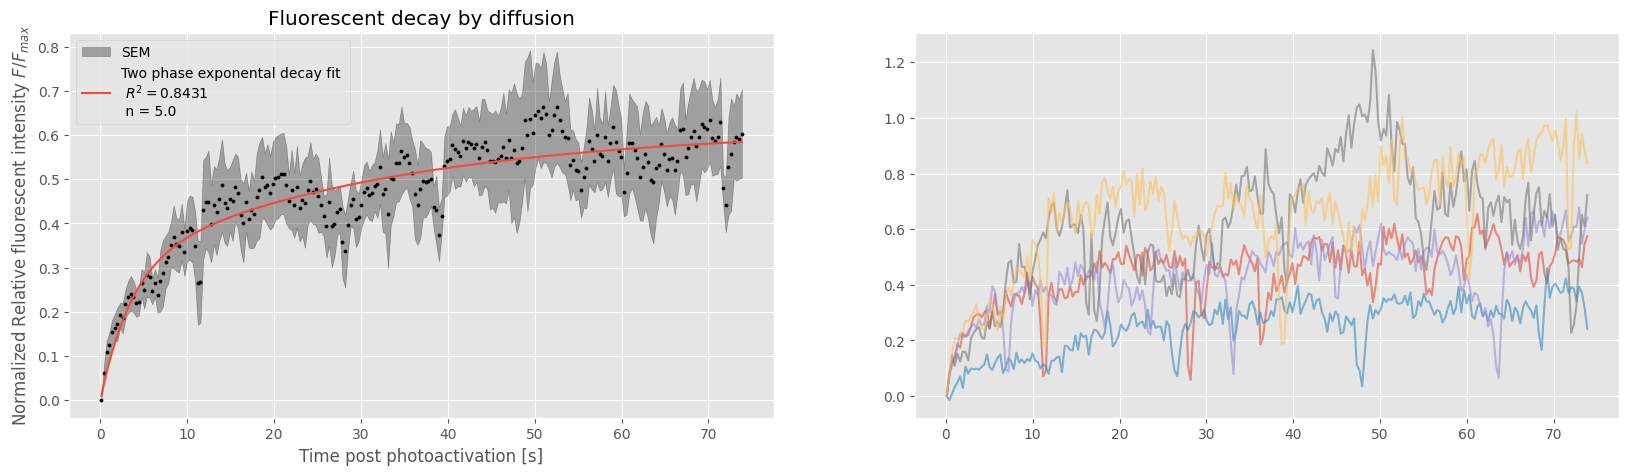

In [5]:
glyco_ctrl = glycox.add_experiment('Control',10, '/Volumes/HELHEIM/analyzed_data/diffusivity/glycogen_overexpression/ctrl')

In [6]:
glyco_oex = glycox.add_experiment('Glycogenase', 10, '/Volumes/HELHEIM/analyzed_data/diffusivity/glycogen_overexpression/oex')

In [7]:
glycox.plot_experiments([])

Control 10hpf
Glycogenase 10hpf


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


22.14583768998755 31.949690211676938
12.461729301744144 17.97847506452696


<Figure size 640x480 with 0 Axes>

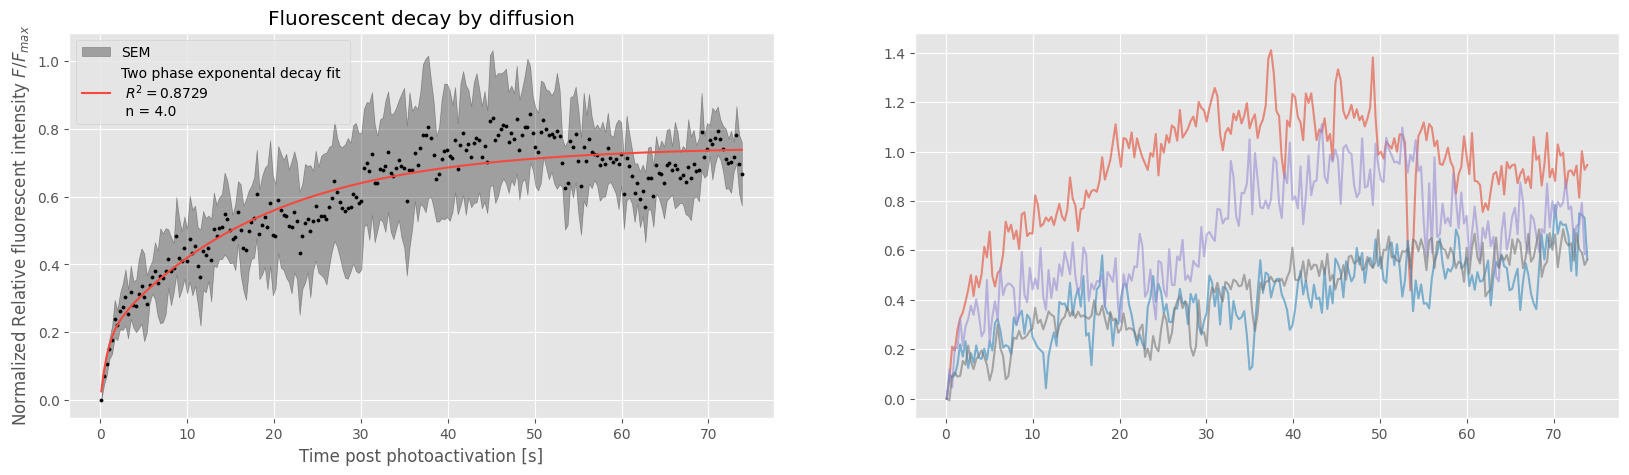

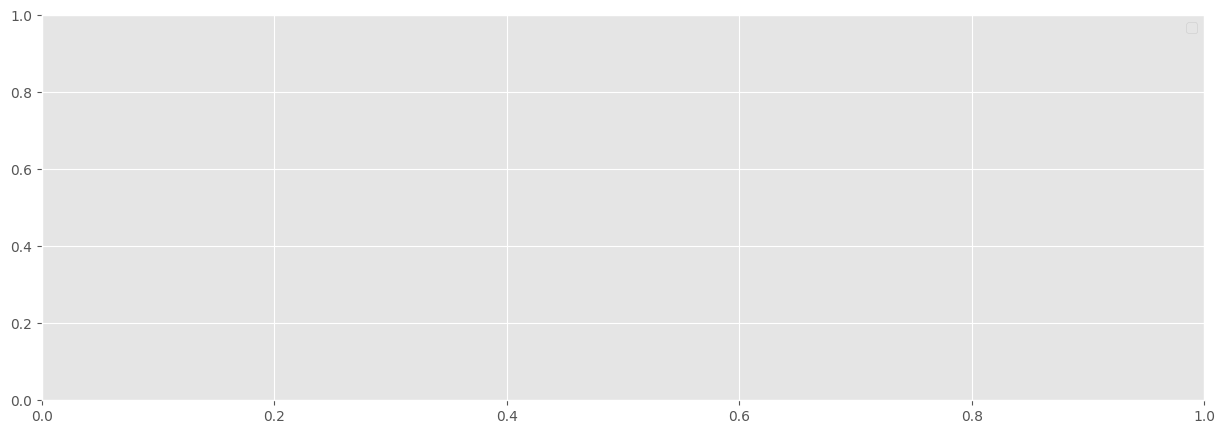

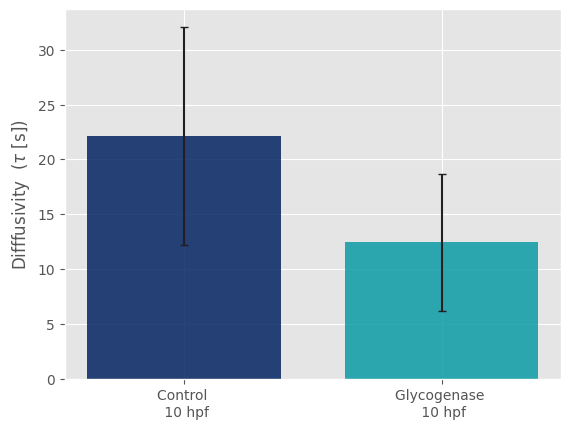

In [8]:
bar_graphs(['Control 10hpf', 'Glycogenase 10hpf'], 'f040')